In [1]:
print("hello world")

hello world


In [3]:
import json
import os
drive_path = "DC_hand_annotated/DC_hand_annotated"

In [4]:
# Check if the drive path exists
if os.path.exists(drive_path):
    print(f"Drive path exists: {drive_path}")
else:
    print("Drive path not found")

# List files in the 'DC_hand_annotated' directory
files = os.listdir(drive_path)
print("Files in DC_hand_annotated:", files)


Drive path exists: DC_hand_annotated/DC_hand_annotated
Files in DC_hand_annotated: ['nuscenes', 'drivingcontexts_annotations.json', 'pittsburgh', 'web', 'kitti', 'drivingcontexts_questions.json']


In [5]:
# === STEP 2: Install Dependencies ===
!pip install transformers timm

     |████████████████████████████████| 10.4 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 36.8 MB/s eta 0:00:01
     |████████████████████████████████| 481 kB 38.7 MB/s eta 0:00:01
  Using cached torch-2.6.0-cp39-cp39-manylinux1_x86_64.whl (766.7 MB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl (56.3 MB)
  Using cached nvidia_nvtx_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (99 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (13.8 MB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl (211.5 MB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl (363.4 MB)
  Using cached triton-3.2.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (253.1 MB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (24.6 MB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl (207.5 MB)
  Usin

In [8]:
!pip install opencv-python


     |████████████████████████████████| 63.0 MB 5.0 kB/s eta 0:00:01


In [9]:
import os
import json
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [10]:
# === STEP 3: Imports ===
import json
from PIL import Image
from tqdm import tqdm

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

from transformers import ViltProcessor, ViltForQuestionAnswering

In [11]:
# Load questions and annotations
with open(os.path.join(drive_path, 'drivingcontexts_questions.json'), 'r') as f:
    questions_data = json.load(f)

with open(os.path.join(drive_path, 'drivingcontexts_annotations.json'), 'r') as f:
    annotations_data = json.load(f)

In [12]:
# === STEP 3: Prepare Data (Merge Questions and Annotations) ===
# Merging question data with their corresponding answers from annotations

merged_data = []

for q in questions_data['questions']:
    # Find the corresponding annotation for the question
    matching_annotation = next((a for a in annotations_data['annotations'] if a['question_id'] == q['question_id']), None)

    if matching_annotation:
        # Extract the correct answer (for simplicity, let's assume 'yes'/'no' answers)
        answer = matching_annotation['answers'][0]['answer']  # Adjust this if you need to extract a specific answer
        merged_data.append({
            'image_id': q['image_id'],
            'question': q['question'],
            'question_id': q['question_id'],
            'answer': answer
        })

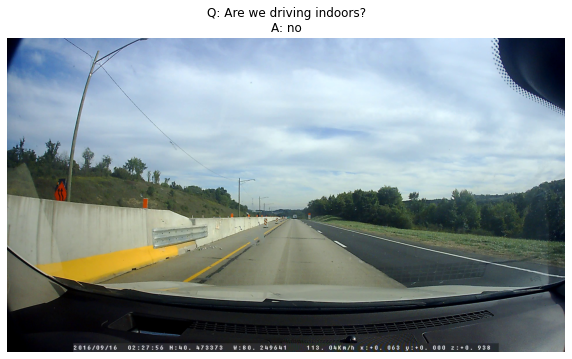

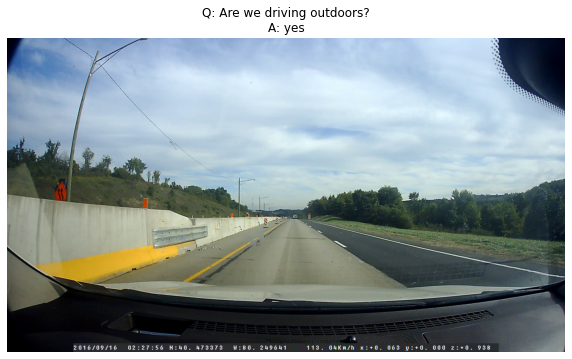

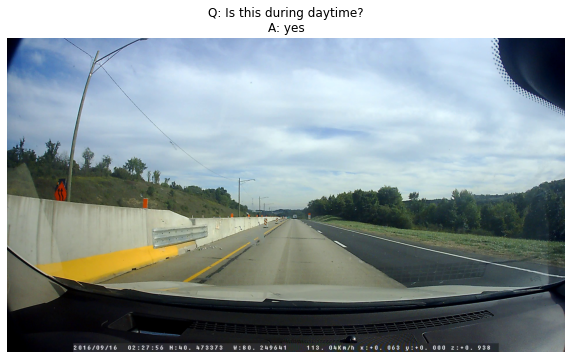

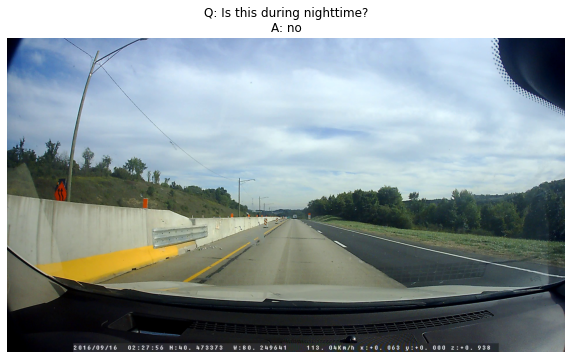

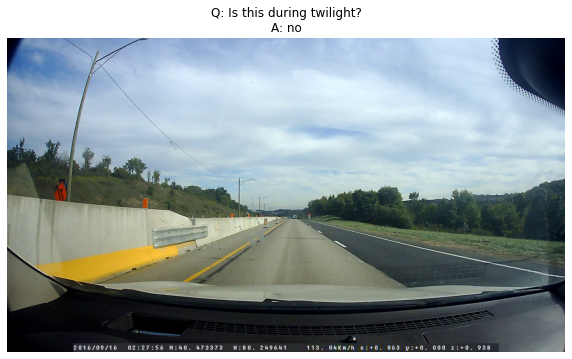

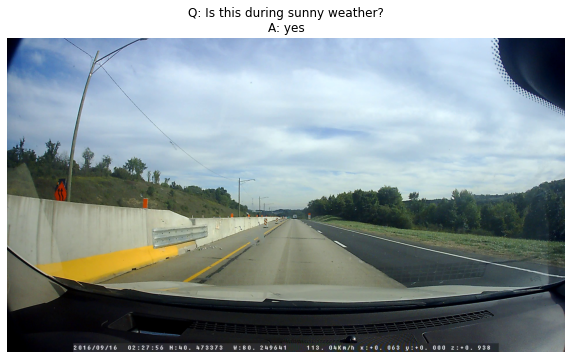

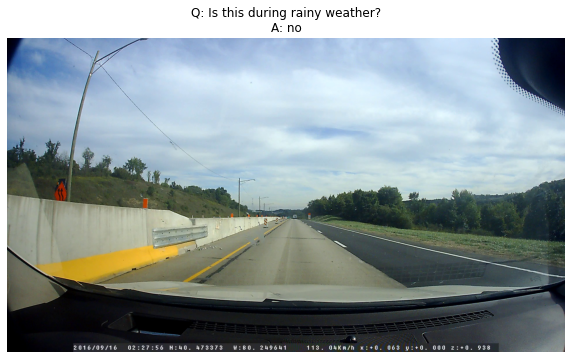

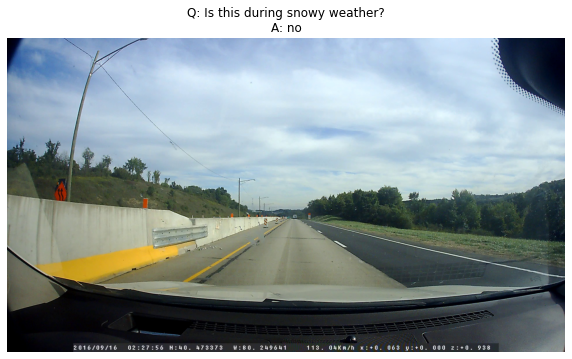

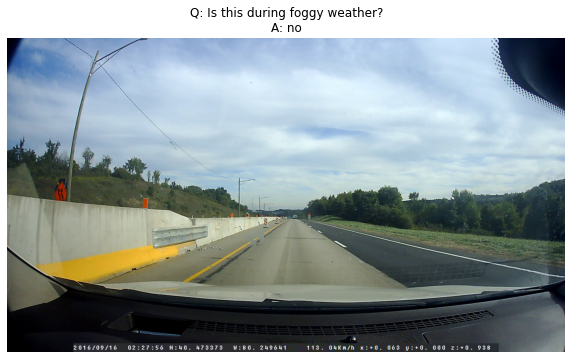

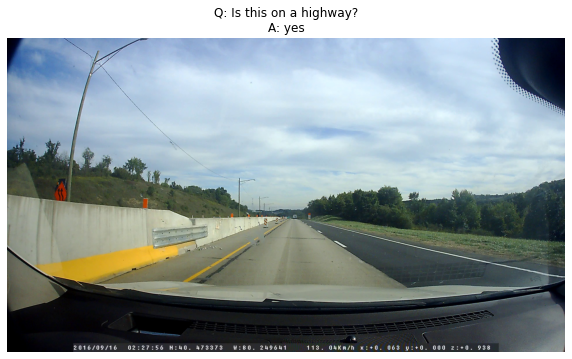

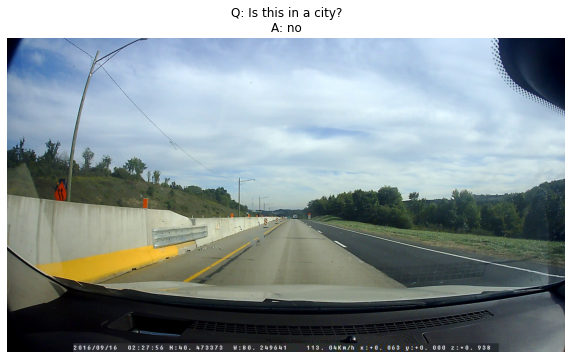

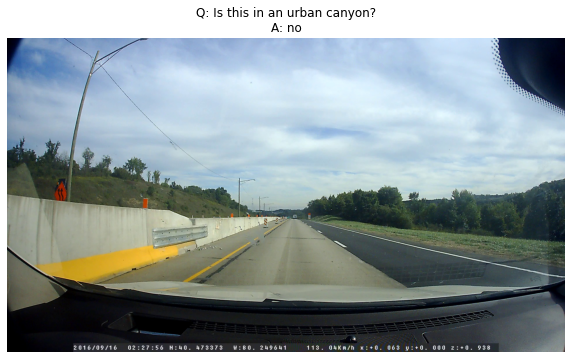

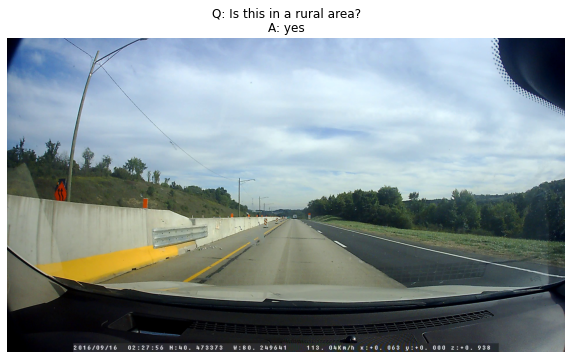

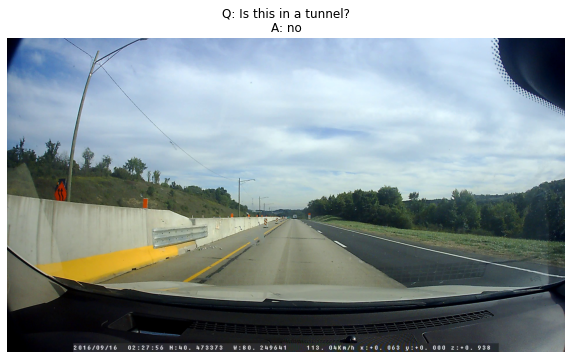

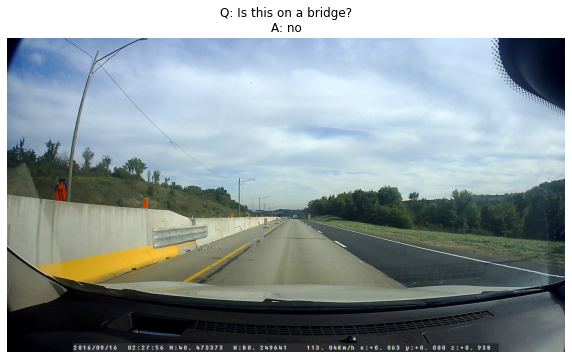

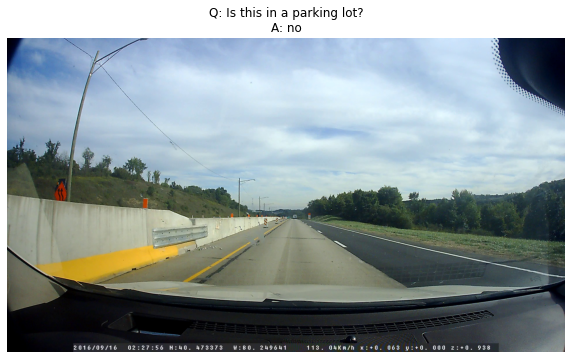

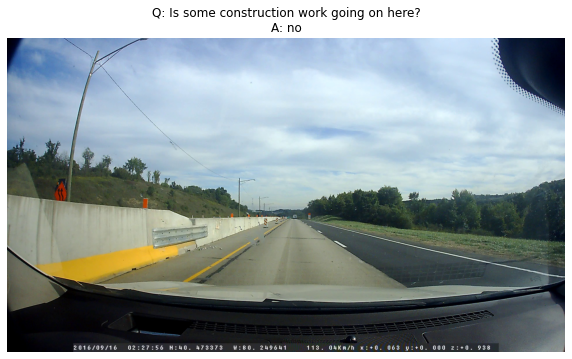

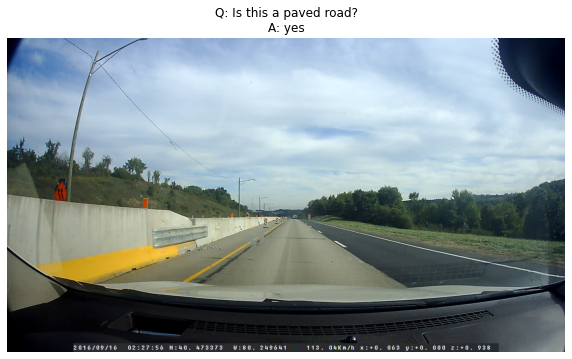

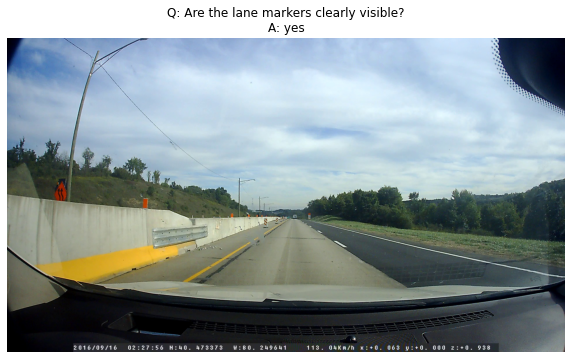

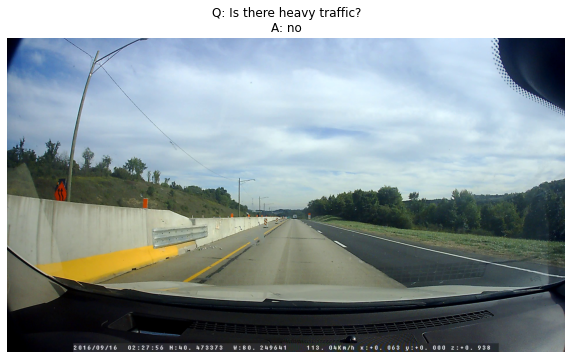

In [13]:
# === STEP 4: Display Images with Corresponding Questions and Answers ===
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display the first 10 images with their corresponding question and answer
for i in range(20):
    image_id = merged_data[i]['image_id']
    question = merged_data[i]['question']
    answer = merged_data[i]['answer']

    # Assuming image_id is the filename or an identifier for the image file
    # The image_id already includes the path relative to the 'pittsburgh' directory
    # and has the .jpg extension, so we just need to join it with the drive_path
    image_path = os.path.join(drive_path, image_id)
    img = mpimg.imread(image_path)

    # Plot the image and show question and answer
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(f"Q: {question}\nA: {answer}")
    plt.show()

In [14]:
# === STEP 4: Calculate Accuracy, Precision, Recall, and F1 Score ===

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def evaluate_model(predictions, ground_truth):
    """
    Evaluate the model's predictions against the ground truth using Accuracy, Precision, Recall, and F1 Score.

    Args:
    - predictions: List of predicted answers from the model.
    - ground_truth: List of true answers (ground truth).

    Returns:
    - A dictionary containing accuracy, precision, recall, and f1 score.
    """
    # Accuracy
    accuracy = accuracy_score(ground_truth, predictions)

    # Precision, Recall, and F1 Score
    precision = precision_score(ground_truth, predictions, pos_label='yes', average='binary')
    recall = recall_score(ground_truth, predictions, pos_label='yes', average='binary')
    f1 = f1_score(ground_truth, predictions, pos_label='yes', average='binary')

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
# Removed the 'Z' as it was likely a typo and not intended to be there.

In [15]:

ground_truth = [item['answer'] for item in merged_data[:10]]

In [16]:
# === STEP 5: Generate Predictions using Your Model ===
predictions = []
for i in range(10):  # Use the same range as ground_truth (first 10 samples)
    # Get image and question
    image = merged_data[i]['image_id']
    question = merged_data[i]['question']

    # TODO: Preprocess image and question to your ViltForQuestionAnswering model
    # Run model inference to get a prediction
    prediction = 'yes'  # Replace with model output logic

    predictions.append(prediction)

# === STEP 6: Evaluate Model ===
metrics = evaluate_model(predictions, ground_truth)

In [17]:
# === STEP 6: Evaluate Model ===
metrics = evaluate_model(predictions, ground_truth)

# === STEP 7: Output the Results ===
print(f"Accuracy: {metrics['accuracy']*100:.2f}%")
print(f"Precision: {metrics['precision']:.2f}")
print(f"Recall: {metrics['recall']:.2f}")
print(f"F1 Score: {metrics['f1_score']:.2f}")

Accuracy: 40.00%
Precision: 0.40
Recall: 1.00
F1 Score: 0.57


In [18]:
# === STEP A: Setup Environment ===
!pip install transformers datasets torchvision

import torch
from transformers import ViltProcessor, ViltForQuestionAnswering, Trainer, TrainingArguments
from datasets import Dataset
from PIL import Image

# Load ViLT model and processor
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# === STEP B: Continual Learning Training Loop ===

def prepare_batch_data(batch):
    images, questions, answers = [], [], []
    for item in batch:
        image_path = os.path.join(drive_path, item['image_id'])
        image = Image.open(image_path).convert("RGB")
        images.append(image)
        questions.append(item['question'])
        answers.append(item['answer'])
    return processor(images=images, text=questions, return_tensors="pt", padding=True, truncation=True), answers

# Create incremental batches for continual learning
batch_size = 32
all_batches = [merged_data[i:i + batch_size] for i in range(0, len(merged_data), batch_size)]

# Fine-tune incrementally
for i, batch in enumerate(all_batches[:3]):  # You can increase range for more learning
    print(f"\n=== Training on batch {i+1} ===")
    inputs, labels = prepare_batch_data(batch)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    targets = [1 if a == "yes" else 0 for a in labels]  # Binary labels
    target_tensor = torch.tensor(targets).to(device)

    outputs = model(**inputs)
    logits = outputs.logits
    loss_fn = torch.nn.CrossEntropyLoss()
    loss = loss_fn(logits, target_tensor)
    loss.backward()
    optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
    optimizer.step()
    optimizer.zero_grad()
    print(f"Loss: {loss.item():.4f}")

# === STEP C: Predict with Fine-tuned Model ===

# Evaluate on 10 samples
predictions = []
for item in merged_data[:10]:
    image_path = os.path.join(drive_path, item['image_id'])
    image = Image.open(image_path).convert("RGB")
    encoding = processor(image, item['question'], return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**encoding)
        predicted = torch.argmax(outputs.logits, dim=1).item()
        predictions.append("yes" if predicted == 1 else "no")


     |████████████████████████████████| 491 kB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 193 kB 34.5 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 1.3 MB/s  eta 0:00:01
     |████████████████████████████████| 116 kB 38.2 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 3.1 MB/s  eta 0:00:01
     |████████████████████████████████| 42.1 MB 94 kB/s s eta 0:00:01
     |████████████████████████████████| 133 kB 38.1 MB/s eta 0:00:01
     |████████████████████████████████| 183 kB 38.6 MB/s eta 0:00:01
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.0
    Uninstalling tqdm-4.64.0:
      Successfully uninstalled tqdm-4.64.0
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninsta

model.safetensors:   0%|          | 0.00/470M [00:00<?, ?B/s]


=== Training on batch 1 ===
Loss: 21.7998

=== Training on batch 2 ===
Loss: 17.1714

=== Training on batch 3 ===
Loss: 13.0401


In [20]:
# Evaluate
ground_truth = [item['answer'] for item in merged_data[:10]]
metrics = evaluate_model(predictions, ground_truth)
print(f"Accuracy: {metrics['accuracy']*100:.2f}%")



Accuracy: 60.00%


/u/student/2024/cs24resch11014/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
import numpy as np

def enable_dropout(model):
    """Enable dropout layers during inference."""
    for m in model.modules():
        if m.__class__.__name__.startswith('Dropout'):
            m.train()

def get_uncertainty_predictions(image, question, runs=10):
    encoding = processor(image, question, return_tensors="pt").to(device)
    all_logits = []

    model.eval()
    enable_dropout(model)  # Enable dropout at inference

    for _ in range(runs):
        with torch.no_grad():
            outputs = model(**encoding)
            logits = torch.nn.functional.softmax(outputs.logits, dim=1)
            all_logits.append(logits.cpu().numpy())

    stacked = np.stack(all_logits)
    mean_logits = stacked.mean(axis=0)
    std_logits = stacked.std(axis=0)

    pred_class = np.argmax(mean_logits)
    uncertainty = std_logits[0][pred_class]
    return "yes" if pred_class == 1 else "no", uncertainty


In [23]:
# === STEP 1: Sort data for Continual Learning Simulation ===
# Shuffle for randomness
import random
random.shuffle(merged_data)

# Divide into 4 incremental batches (e.g., 25% each)
split_1 = merged_data[:len(merged_data)//4]
split_2 = merged_data[len(merged_data)//4:len(merged_data)//2]
split_3 = merged_data[len(merged_data)//2:3*len(merged_data)//4]
split_4 = merged_data[3*len(merged_data)//4:]

continual_splits = [split_1, split_2, split_3, split_4]


In [24]:
from transformers import ViltProcessor, ViltForQuestionAnswering
import torch.nn.functional as F
import torch

# Load ViLT processor and model
processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

# Put model in train mode to enable dropout during inference (for MC Dropout)
model.train()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


ViltForQuestionAnswering(
  (vilt): ViltModel(
    (embeddings): ViltEmbeddings(
      (text_embeddings): TextEmbeddings(
        (word_embeddings): Embedding(30522, 768)
        (position_embeddings): Embedding(40, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (patch_embeddings): ViltPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32))
      )
      (token_type_embeddings): Embedding(2, 768)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViltEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViltLayer(
          (attention): ViltAttention(
            (attention): ViltSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=76

In [25]:
from PIL import Image
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

results_list = []

def predict_with_uncertainty(image_path, question, n_samples=10):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(image, question, return_tensors="pt").to(device)

    outputs = []
    for _ in range(n_samples):
        with torch.no_grad():
            output = model(**inputs).logits
            outputs.append(F.softmax(output, dim=1).cpu().numpy())
    probs = np.array(outputs)
    mean_probs = probs.mean(axis=0)[0]
    std_dev = probs.std(axis=0)[0]
    return mean_probs, std_dev

def evaluate_batch(batch, batch_id):
    y_true, y_pred, uncertainties = [], [], []
    records = []

    for item in batch:
        image_path = os.path.join(drive_path, item['image_id'])
        mean_probs, std = predict_with_uncertainty(image_path, item['question'])
        pred_label = model.config.id2label[np.argmax(mean_probs)]
        true_label = item['answer']

        y_pred.append(pred_label)
        y_true.append(true_label)
        uncertainties.append(np.mean(std))  # average uncertainty across 2 classes

        records.append({
            'image_id': item['image_id'],
            'question': item['question'],
            'ground_truth': true_label,
            'prediction': pred_label,
            'uncertainty': np.mean(std)
        })

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label='yes')
    recall = recall_score(y_true, y_pred, pos_label='yes')
    f1 = f1_score(y_true, y_pred, pos_label='yes')

    print(f"\n=== Batch {batch_id} Evaluation ===")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    results_list.append({
        'batch': batch_id,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'avg_uncertainty': np.mean(uncertainties)
    })

    return pd.DataFrame(records)


In [26]:
all_records_df = pd.DataFrame()

for i, batch in enumerate(continual_splits):
    batch_df = evaluate_batch(batch, batch_id=i+1)
    all_records_df = pd.concat([all_records_df, batch_df], ignore_index=True)

# Save predictions + uncertainty
all_records_df.to_csv(os.path.join(drive_path, 'predictions_with_uncertainty.csv'), index=False)

# Save metrics per batch
metrics_df = pd.DataFrame(results_list)
metrics_df.to_csv(os.path.join(drive_path, 'batchwise_metrics.csv'), index=False)



=== Batch 1 Evaluation ===
Accuracy: 0.90
Precision: 0.78
Recall: 0.88
F1 Score: 0.83

=== Batch 2 Evaluation ===
Accuracy: 0.90
Precision: 0.79
Recall: 0.87
F1 Score: 0.83

=== Batch 3 Evaluation ===
Accuracy: 0.90
Precision: 0.78
Recall: 0.87
F1 Score: 0.82

=== Batch 4 Evaluation ===
Accuracy: 0.90
Precision: 0.77
Recall: 0.86
F1 Score: 0.81


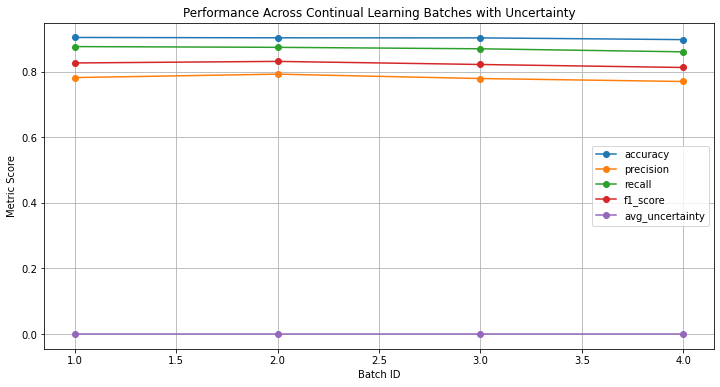

In [27]:
# Plot metrics
plt.figure(figsize=(12, 6))
for metric in ['accuracy', 'precision', 'recall', 'f1_score', 'avg_uncertainty']:
    plt.plot(metrics_df['batch'], metrics_df[metric], marker='o', label=metric)

plt.title("Performance Across Continual Learning Batches with Uncertainty")
plt.xlabel("Batch ID")
plt.ylabel("Metric Score")
plt.legend()
plt.grid(True)
plt.show()

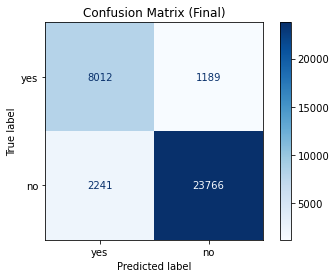

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

final_y_true = all_records_df['ground_truth']
final_y_pred = all_records_df['prediction']
cm = confusion_matrix(final_y_true, final_y_pred, labels=['yes', 'no'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['yes', 'no'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Final)")
plt.show()
